In [1]:
import pandas as pd
import numpy as np
# from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
# import wordcloud
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('C:/Users/tyler/SM148_project/complete_data/complete_data.csv')
data.head()

location       date  likes  retweets  \
0         Pomona, CA   4/4/2020  89921     34665   
1  Santa Barbara, CA  4/21/2020  34308      5245   
2    California, USA  4/21/2020      0         0   
3       Arizona, USA  4/19/2020      4         0   
4        Medford, MA   4/6/2020      0         0   

                                                text           city  \
0  A day without Hispanics .... this country coul...         Pomona   
1  XO face masks are back to raise money and Iâ...  Santa Barbara   
2  @ImKingGinger Well aren't you special? My rela...       Not City   
3  @seanhannity If I was to stay home and eat ice...       Not City   
4  @MisagaLion @tedpanos Yup, CT. Governor spoke ...        Medford   

           state  is_state state_abbr             city_and_state  ...  \
0     California     False         CA         Pomona, California  ...   
1     California     False         CA  Santa Barbara, California  ...   
2     California      True         CA       Not City, California  ...   
3        Arizona      True         AZ          Not City, Arizona  ...   
4  Massachusetts     False         MA     Medford, Massachusetts  ...   

  Recovered  Active  polarity_neg  polarity_pos polarity_compound  \
0       NaN     NaN         0.000         0.000            0.0000   
1       NaN     NaN         0.067         0.080            0.1280   
2       NaN     NaN         0.258         0.052           -0.8104   
3     994.0  3755.0         0.162         0.110           -0.4497   
4       NaN     NaN         0.224         0.108           -0.6988   

  polarity_classif polarity_classif2  latitude  longitude  \
0                0                 0  34.05529 -117.75228   
1                1                 1  34.42083 -119.69819   
2               -1                -1  34.68743 -116.78467   
3               -1                -1  34.50030 -111.50098   
4               -1                -1  42.41843  -71.10616   

              coordinates  
0  (34.05529, -117.75228)  
1  (34.42083, -119.69819)  
2  (34.68743, -116.78467)  
3   (34.5003, -111.50098)  
4   (42.41843, -71.10616)  

[5 rows x 30 columns]

In [7]:
negative_tweets = data.sort_values('polarity_compound')[['polarity_compound','text']].head()
positive_tweets = data.sort_values('polarity_compound')[['polarity_compound','text']].tail()
for i,t in negative_tweets.iterrows():
    print('polarity score:',t.polarity_compound,'\ntext:\n',t.text)
# for i,t in positive_tweets.iterrows():
#     print('polarity score:',t.polarity_compound,'\ntext:\n',t.text)

polarity score: -0.9994 
text:
 No no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no https://t.co/I2n3r97sKb
polarity score: -0.9952 
text:
 Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud.
Fauci is a fraud. https://t.co/MnXwNLnBJi
polarity score: -0.9929 
text:
 FUCK FUCK FUCK FUCK FUCK FUCK FUCK FUCK FUCK FUCK https://t.co/4RVZ6FkzI6
polarity score: -0.9925 
text:
 Fake food, fake relationships, fake medicine, fake news, fake currencies, fake bodies, fake idols, fake personalities, fake education, fake photos, fake science, fake history, fake events, fake pandemic, fake world. ð

In [6]:
neutral_tweets = data.loc[data.polarity_compound.between(-0.05,0.05),]
for i,t in neutral_tweets[6:12].iterrows():
    print('polarity score:',t.polarity_compound,'\ntext:\n',t.text)

polarity score: 0.0 
text:
 How does that work six feet away? https://t.co/5wFHKtBzzJ
polarity score: 0.0 
text:
 ðð¾ðð¾ðð¾ðð¾ https://t.co/qhrX0Zj8aL
polarity score: 0.0 
text:
 Hey baby https://t.co/pCqHbgsI6A
polarity score: -0.0352 
text:
 Yeah cuz silencing and banning every video that is skeptical of 5G is really going to reassure people that there's no issues with it.

Nothing to see here folks. https://t.co/i5PwcKvwfE
polarity score: 0.0 
text:
 Hey Gates this one is for you. https://t.co/PWKblx0Y2p https://t.co/3wNYBbgtYD
polarity score: 0.0 
text:
 https://t.co/zwMDgCmxTj https://t.co/BkvDEXJGjM


In [3]:
# check most frequent locations
loc0 = [loc.lower() for loc in data['location']] # whole
loc2 = [loc.split(', ')[1].lower() for loc in data['location']] # state
loc1 = [loc.split(', ')[0].lower() for loc in data['location']] # city
# if 2nd part of location is usa -> get 1st part as state

freq_loc = sorted(loc0)
loc_freq = Counter(freq_loc)
loc_freq.most_common()

[('california, usa', 223),
 ('los angeles, ca', 167),
 ('new york, ny', 167),
 ('washington, dc', 145),
 ('florida, usa', 141),
 ('texas, usa', 134),
 ('new york, usa', 108),
 ('chicago, il', 100),
 ('atlanta, ga', 86),
 ('houston, tx', 86),
 ('seattle, wa', 82),
 ('san francisco, ca', 73),
 ('pennsylvania, usa', 68),
 ('dallas, tx', 65),
 ('austin, tx', 63),
 ('brooklyn, ny', 63),
 ('ohio, usa', 62),
 ('las vegas, nv', 60),
 ('michigan, usa', 60),
 ('philadelphia, pa', 59),
 ('san diego, ca', 59),
 ('new jersey, usa', 57),
 ('georgia, usa', 55),
 ('boston, ma', 54),
 ('north carolina, usa', 53),
 ('virginia, usa', 51),
 ('portland, or', 50),
 ('illinois, usa', 46),
 ('arizona, usa', 45),
 ('massachusetts, usa', 45),
 ('miami, fl', 44),
 ('washington, usa', 44),
 ('denver, co', 43),
 ('colorado, usa', 37),
 ('minnesota, usa', 37),
 ('baltimore, md', 36),
 ('pittsburgh, pa', 36),
 ('maryland, usa', 35),
 ('phoenix, az', 35),
 ('detroit, mi', 32),
 ('nashville, tn', 32),
 ('minneapolis, 

In [4]:
mask_data = pd.read_csv('mask_mandate_no_na_smaller.csv')
mask_data['State_Tribe_Territory'].unique()
# mask_data['County_Name'].unique()
# mask_data['County']
# freq_counties = Counter(mask_data['County_Name'])
# freq_counties.most_common()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'DC', 'CT', 'FL', 'DE', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MA', 'MD',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'VI'], dtype=object)

In [15]:
# same but for 4 month data
four_mon = pd.read_csv('tweet_data/model_test_data.csv')
freq_states = Counter(four_mon['state'])
freq_states 

Counter({'California': 4165,
         'Arizona': 699,
         'Massachusetts': 756,
         'Puerto Rico': 87,
         'Texas': 2319,
         'Florida': 1906,
         'New Jersey': 563,
         'Maryland': 542,
         'Virginia': 671,
         'Roodhouse': 1,
         'Missouri': 394,
         'Pennsylvania': 1020,
         'Oklahoma': 235,
         'New York': 2111,
         'Alaska': 60,
         'Louisiana': 253,
         'South Carolina': 279,
         'chino hills': 1,
         'Santa Fe': 1,
         'CO and Houston': 2,
         'Stolen Minsi land in NY': 2,
         'Southern California': 10,
         'Washington': 898,
         'Rural Oregon': 1,
         'Tennessee': 517,
         'Indiana': 402,
         'Georgia': 789,
         'Colorado': 578,
         'Illinois': 924,
         'Ohio': 829,
         'St. Louis (County)': 2,
         'New Mexico': 164,
         'Nevada': 347,
         'Nova Iorque': 8,
         'Kentucky': 257,
         'Wisconsin': 358,
         'O

In [ ]:
# check likes distribution
sub_data = data.loc[data['likes']<100,]
plt.hist(sub_data.likes,bins=50)

In [2]:
all_data = pd.read_csv('..\complete_data\complete_data_cases.csv')
mentions_mask_data = all_data.loc[all_data['mentions_mask']==True,:]

### Check dates complete

<AxesSubplot:ylabel='Frequency'>

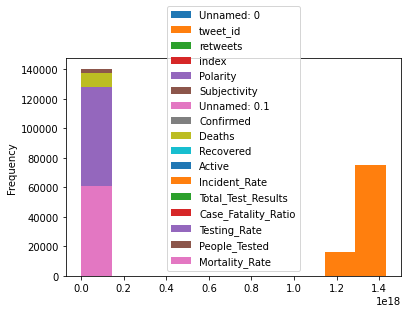

In [4]:
all_data.plot.hist(x='likes')

<AxesSubplot:xlabel='date', ylabel='likes'>

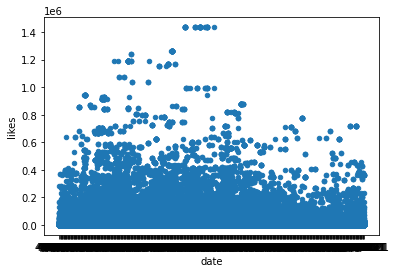

In [3]:
all_data.plot.scatter(x='date',y='likes')

In [28]:
print(all_data.shape)
polar_data = all_data.loc[abs(all_data['Polarity']) >=0.5,]
print(polar_data.shape)
subj_data = all_data.loc[abs(all_data['Subjectivity']) >=0.5,]
print(subj_data.shape)

(140383, 33)
(12994, 33)
(49043, 33)


In [ ]:
# check the kind of tweets with high subj -> combine all text -> find most frequent words/bigrams
all_polar_text = []
for i, row in polar_data.iterrows():
    # print(row['Polarity'], row['text'])
    all_polar_text = all_polar_text + row['text'].split(' ') # add all words from tweet

# print(all_polar_text)
filt_all_polar_text = []
stopWords = set(stopwords.words('english'))
for w in all_polar_text:
    if w not in stopWords:
        filt_all_polar_text.append(w)

Counter(filt_all_polar_text).most_common()

[('', 2218),
 ('I', 2096),
 ('people', 1134),
 ('COVID', 1073),
 ('pandemic', 1072),
 ('The', 1038),
 ('&amp;', 942),
 ('COVID-19', 889),
 ('get', 841),
 ('This', 780),
 ('Covid', 710),
 ('Trump', 687),
 ('like', 589),
 ('#COVID19', 526),
 ('We', 514),
 ('one', 506),
 ('coronavirus', 494),
 ('covid', 477),
 ('wear', 477),
 ('would', 467),
 ('best', 460),
 ('many', 455),
 ('vaccine', 454),
 ('-', 435),
 ('mask', 433),
 ('good', 415),
 ('need', 412),
 ('A', 378),
 ('great', 374),
 ('us', 373),
 ('Americans', 364),
 ('died', 363),
 ('still', 359),
 ('going', 349),
 ('You', 340),
 ('If', 339),
 ('Iâ\x80\x99m', 336),
 ('want', 335),
 ('pandemic.', 331),
 ('donâ\x80\x99t', 325),
 ('getting', 323),
 ('stay', 317),
 ('home', 312),
 ('know', 309),
 ('think', 309),
 ('even', 306),
 ('go', 300),
 ('itâ\x80\x99s', 282),
 ('make', 277),
 ('More', 277),
 ('safe', 272),
 ('got', 269),
 ('time', 268),
 ('see', 266),
 ('help', 263),
 ('health', 260),
 ('better', 256),
 ('keep', 252),
 ('way', 252),
 ('

In [30]:
# check the kind of tweets with low/high subjectivity
# check the kind of tweets with high subj -> combine all text -> find most frequent words/bigrams
all_subj_text = []
for i, row in subj_data.iterrows():
    # print(row['Polarity'], row['text'])
    all_subj_text = all_subj_text + row['text'].split(' ') # add all words from tweet

# print(all_polar_text)
filt_all_subj_text = []
stopWords = set(stopwords.words('english'))
for w in all_subj_text:
    if w not in stopWords:
        filt_all_subj_text.append(w)

Counter(filt_all_subj_text).most_common()

[('I', 10134),
 ('', 7982),
 ('people', 5640),
 ('The', 5068),
 ('COVID', 4967),
 ('&amp;', 4840),
 ('pandemic', 4480),
 ('COVID-19', 4015),
 ('get', 3816),
 ('Trump', 3191),
 ('Covid', 3071),
 ('This', 2850),
 ('like', 2538),
 ('one', 2425),
 ('coronavirus', 2203),
 ('We', 2113),
 ('would', 2109),
 ('covid', 2037),
 ('#COVID19', 1995),
 ('vaccine', 1953),
 ('-', 1914),
 ('still', 1805),
 ('wear', 1774),
 ('cases', 1767),
 ('many', 1730),
 ('need', 1716),
 ('mask', 1676),
 ('going', 1642),
 ('Americans', 1630),
 ('know', 1623),
 ('If', 1610),
 ('us', 1604),
 ('new', 1599),
 ('A', 1582),
 ('positive', 1561),
 ('even', 1510),
 ('want', 1466),
 ('donâ\x80\x99t', 1447),
 ('pandemic.', 1441),
 ('Iâ\x80\x99m', 1409),
 ('make', 1400),
 ('itâ\x80\x99s', 1361),
 ('got', 1329),
 ('right', 1315),
 ('go', 1308),
 ('You', 1302),
 ('getting', 1287),
 ('stay', 1272),
 ('could', 1267),
 ('think', 1260),
 ('It', 1254),
 ('died', 1248),
 ('home', 1246),
 ('take', 1245),
 ('time', 1244),
 ('health', 1187

### Getting shape of datasets

In [3]:
twitter_data = pd.read_csv('C:\\Users\\tyler\\SM148_project\\other_data\\all_tweets.csv')
twitter_data.shape

(130017, 6)

In [4]:
case_data = pd.read_csv('C:\\Users\\tyler\\SM148_project\\other_data\\us_case_data.csv')
case_data.shape

(39168, 14)

In [6]:
mask_data = pd.read_csv('C:\\Users\\tyler\\SM148_project\\other_data\\mask_mandate_no_na_smaller.csv')
mask_data.shape

(1593869, 8)

In [8]:
mask_data.columns

Index(['Unnamed: 0', 'State_Tribe_Territory', 'County_Name', 'FIPS_State',
       'FIPS_County', 'date', 'order_code', 'Face_Masks_Required_in_Public'],
      dtype='object')

In [13]:
final_data = pd.read_csv('C:\\Users\\tyler\\SM148_project\\complete_data\\complete_data.csv')
final_data.shape

(140383, 39)

In [14]:
final_data.columns

Index(['tweet_id', 'location', 'date', 'likes', 'retweets', 'text', 'index',
       'city', 'state', 'is_state', 'state_abbr', 'city_and_state',
       'State_Tribe_Territory', 'Face_Masks_Required_in_Public', 'Polarity',
       'Subjectivity', 'CA', 'LA', 'tokens', 'mentions_mask', 'Unnamed: 0',
       'Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'People_Tested', 'Mortality_Rate', 'polarity_neg',
       'polarity_pos', 'polarity_compound', 'polarity_classif',
       'polarity_classif2', 'latitude', 'longitude'],
      dtype='object')

### Get summary data of columns

In [6]:
data = pd.read_csv('C:/Users/tyler/SM148_project/complete_data/complete_data.csv')
data.head()

location       date  likes  retweets  \
0         Pomona, CA   4/4/2020  89921     34665   
1  Santa Barbara, CA  4/21/2020  34308      5245   
2    California, USA  4/21/2020      0         0   
3       Arizona, USA  4/19/2020      4         0   
4        Medford, MA   4/6/2020      0         0   

                                                text           city  \
0  A day without Hispanics .... this country coul...         Pomona   
1  XO face masks are back to raise money and Iâ...  Santa Barbara   
2  @ImKingGinger Well aren't you special? My rela...       Not City   
3  @seanhannity If I was to stay home and eat ice...       Not City   
4  @MisagaLion @tedpanos Yup, CT. Governor spoke ...        Medford   

           state  is_state state_abbr             city_and_state  ...  \
0     California     False         CA         Pomona, California  ...   
1     California     False         CA  Santa Barbara, California  ...   
2     California      True         CA       Not City, California  ...   
3        Arizona      True         AZ          Not City, Arizona  ...   
4  Massachusetts     False         MA     Medford, Massachusetts  ...   

  Recovered  Active  polarity_neg  polarity_pos polarity_compound  \
0       NaN     NaN         0.000         0.000            0.0000   
1       NaN     NaN         0.067         0.080            0.1280   
2       NaN     NaN         0.258         0.052           -0.8104   
3     994.0  3755.0         0.162         0.110           -0.4497   
4       NaN     NaN         0.224         0.108           -0.6988   

  polarity_classif polarity_classif2  latitude  longitude  \
0                0                 0  34.05529 -117.75228   
1                1                 1  34.42083 -119.69819   
2               -1                -1  34.68743 -116.78467   
3               -1                -1  34.50030 -111.50098   
4               -1                -1  42.41843  -71.10616   

              coordinates  
0  (34.05529, -117.75228)  
1  (34.42083, -119.69819)  
2  (34.68743, -116.78467)  
3   (34.5003, -111.50098)  
4   (42.41843, -71.10616)  

[5 rows x 30 columns]

In [9]:
data.polarity_compound.describe()

count    140383.000000
mean         -0.014960
std           0.499253
min          -0.999400
25%          -0.405650
50%           0.000000
75%           0.397600
max           0.992800
Name: polarity_compound, dtype: float64

<AxesSubplot:>

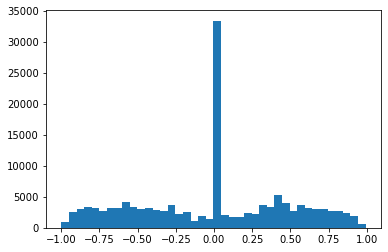

In [17]:
data.polarity_compound.hist(grid=False,bins=40)

<AxesSubplot:xlabel='state_abbr'>

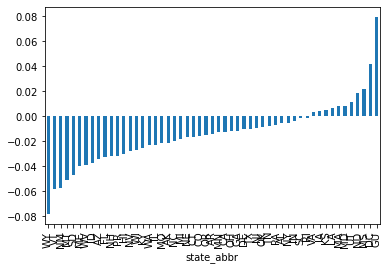

In [23]:
state_means = data.groupby('state_abbr')['polarity_compound'].mean()
state_means = state_means.sort_values()
state_means.plot.bar()